In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.dpi'] = 100
sc.set_figure_params(vector_friendly=True)

In [3]:
hlca = sc.read('../../../../snakemake/hlca/5fold/hlca_hyperparam/data/pp/hlca_hvg_pearson.h5ad')
hlca

AnnData object with n_obs × n_vars = 2149684 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_l

In [4]:
sc.pp.normalize_total(hlca, target_sum=1e4)

In [5]:
sc.pp.log1p(hlca)

In [6]:
hlca.var_names

Index(['ENSG00000175899', 'ENSG00000179869', 'ENSG00000167972',
       'ENSG00000154262', 'ENSG00000141338', 'ENSG00000085563',
       'ENSG00000006071', 'ENSG00000154175', 'ENSG00000099204',
       'ENSG00000072818',
       ...
       'ENSG00000283056', 'ENSG00000004838', 'ENSG00000130844',
       'ENSG00000151789', 'ENSG00000176083', 'ENSG00000174255',
       'ENSG00000124203', 'ENSG00000187498', 'ENSG00000157554',
       'ENSG00000159167'],
      dtype='object', name='ensembl_id', length=2000)

In [7]:
macrophages_genes = {
    'SPP1': 'ENSG00000118785',
    'LIPA': 'ENSG00000107798',
    'LPL': 'ENSG00000175445',
    'FDX1': 'ENSG00000137714',
    'SPARC': 'ENSG00000113140',
    'MATK': 'ENSG00000007264',
    'GPC4': 'ENSG00000076716',
    'PALLD': 'ENSG00000129116',
    'MMP7': 'ENSG00000137673',
    'MMP9': 'ENSG00000100985',
    'CHIT1': 'ENSG00000133063',
    'CSTK': 'ENSG00000143387',
    'CHI3L1': 'ENSG00000133048',
    'CSF1': 'ENSG00000184371',
    'FCMR': 'ENSG00000162894',
    'TIMP3': 'ENSG00000100234',
    'COL22A1': 'ENSG00000169436',
    'SIGLEC15': 'ENSG00000197046',
    'CCL2': 'ENSG00000108691',
}

In [8]:
adata = sc.read('../../../pipeline/data/multigrate_mil/hlca_healthy_ipf_embed_balanced_final/31ab9f26f8_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [9]:
adata.obs.loc[adata.obs['core_or_extension'] == 'core', 'celltype'] = adata[adata.obs['core_or_extension'] == 'core'].obs['ann_level_3'].astype(str)
adata.obs.loc[adata.obs['core_or_extension'] != 'core', 'celltype'] = adata[adata.obs['core_or_extension'] != 'core'].obs['transf_ann_level_3_label'].astype(str)
adata.obs['celltype'] = adata.obs['celltype'].astype('category')

In [10]:
macrophages = hlca[adata[adata.obs['celltype'] == 'Macrophages'].obs_names].copy()
macrophages.obs['cell_attn'] = adata[adata.obs['celltype'] == 'Macrophages'].obs['cell_attn']
macrophages.obsm['X_umap'] = adata[adata.obs['celltype'] == 'Macrophages'].obsm['X_umap']
macrophages

AnnData object with n_obs × n_vars = 158750 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [11]:
sc.tl.score_genes(macrophages, gene_list=list(macrophages_genes.values()), score_name='profibrotic_score')

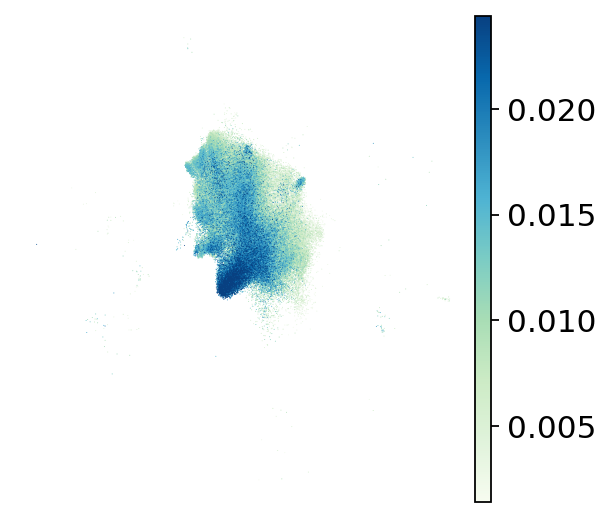

In [12]:
sc.pl.umap(
    macrophages,
    color=['cell_attn'],
    ncols=1,
    frameon=False,
    color_map="GnBu",
    title='',
    legend_loc=None,
    vmax='p99',
    save='_umap_cell_attn_macrophages.svg'
)

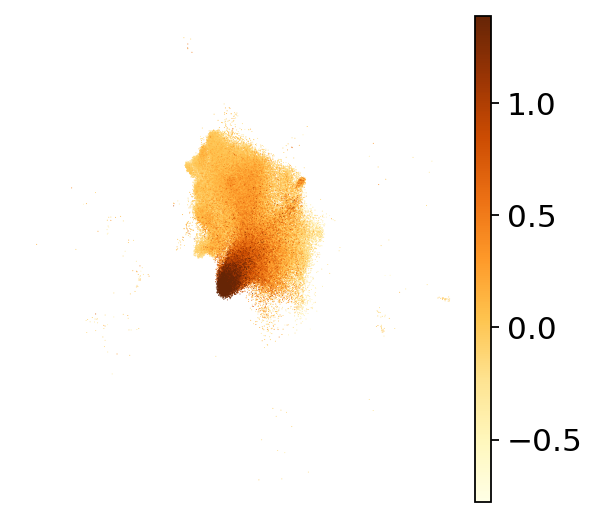

In [13]:
sc.pl.umap(
    macrophages,
    color=['profibrotic_score'],
    ncols=1,
    frameon=False,
    color_map="YlOrBr",
    title='',
    legend_loc=None,
    vmax='p99',
    save='_umap_profibrotic_macrophages.svg'
)

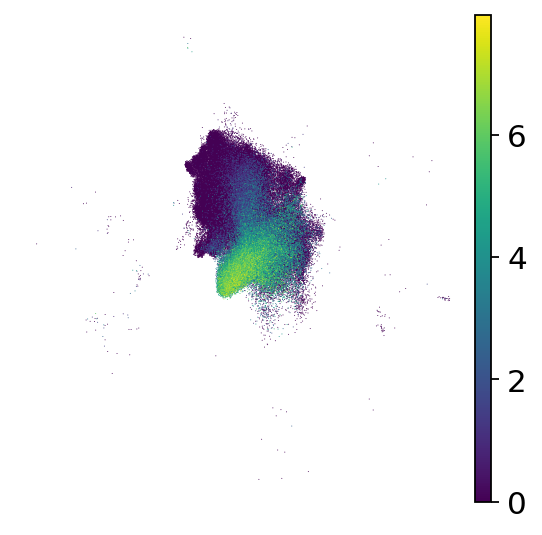

In [14]:
# SSP1 = ENSG00000118785
sc.pl.umap(
    macrophages,
    color=['ENSG00000118785'],
    ncols=1,
    frameon=False,
    color_map="viridis",
    title='',
    legend_loc=None,
    save='_umap_SPP1_macrophages.svg'
)

In [15]:
adata.obs['profibrotic_score'] = np.nan
adata.obs.loc[adata.obs['celltype'] == 'Macrophages', 'profibrotic_score'] = macrophages.obs['profibrotic_score']

In [16]:
cmap = matplotlib.colormaps['coolwarm']

rgba = cmap(0.9)
print(matplotlib.colors.rgb2hex(rgba))

#d65244


In [17]:
adata.uns['lung_condition_coarse_colors'] = ['#5977e3', '#d65244']

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


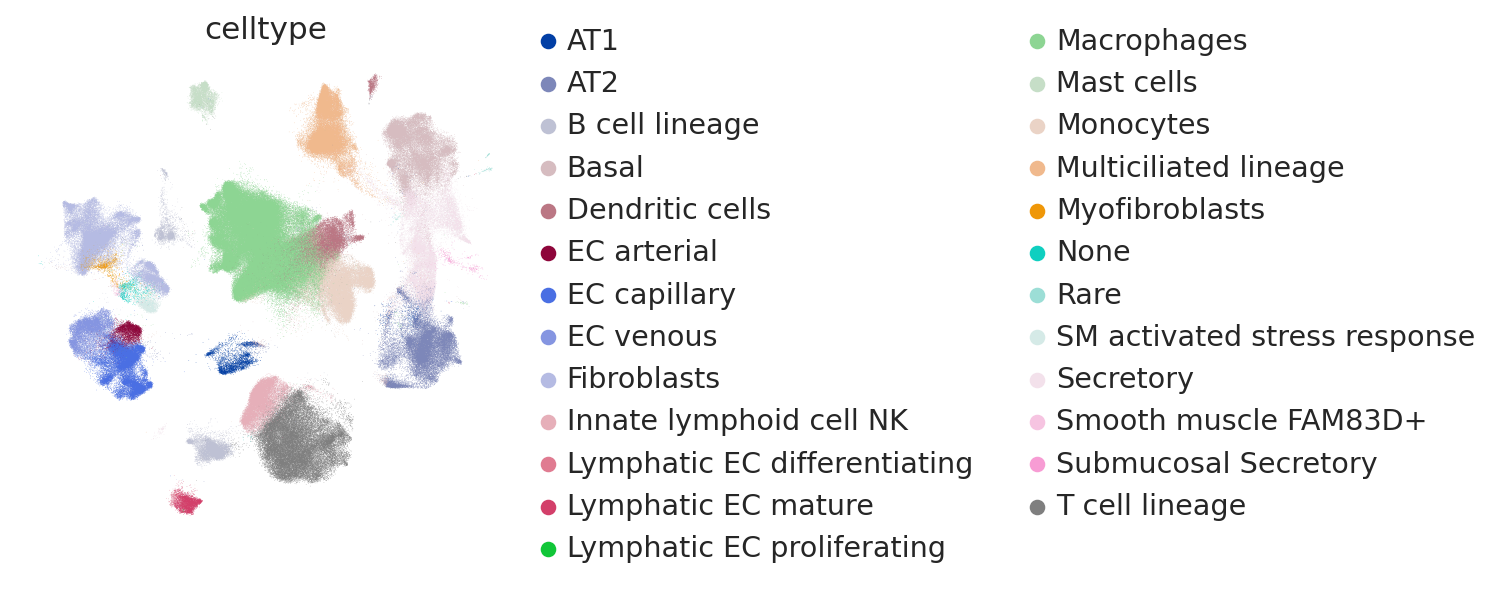

In [18]:
sc.pl.umap(
    adata,
    color=['celltype'],
    ncols=1,
    frameon=False,
    save='_umap_celltype.svg'
)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


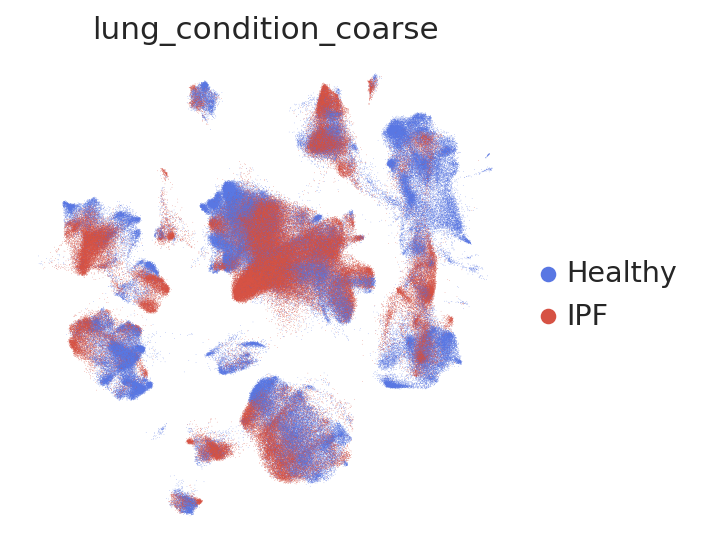

In [19]:
sc.pl.umap(
    adata,
    color=['lung_condition_coarse'],
    ncols=1,
    frameon=False,
    save='_umap_condition.svg'
)

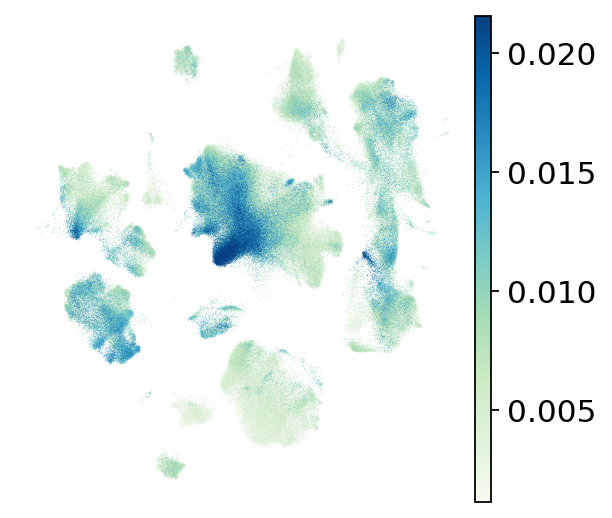

In [20]:
sc.pl.umap(
    adata,
    color=['cell_attn'],
    ncols=1,
    frameon=False,
    color_map="GnBu",
    title='',
    legend_loc=None,
    vmax='p99',
    save='_umap_cell_attn.svg'
)

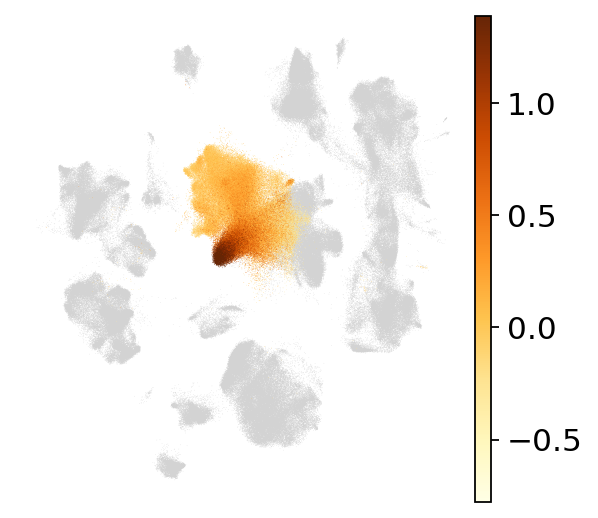

In [21]:
sc.pl.umap(
    adata,
    color=['profibrotic_score'],
    ncols=1,
    frameon=False,
    color_map="YlOrBr",
    title='',
    legend_loc=None,
    vmax='p99',
    save='_umap_profibrotic.svg'
)

all macrophages

In [22]:
pearson_corr = np.corrcoef(macrophages.obs['cell_attn'].values, macrophages.obs['profibrotic_score'].values)
pearson_corr[0, 1]

0.4380847274666544

Text(0.5, 1.0, 'Pearson correlation = 0.44')

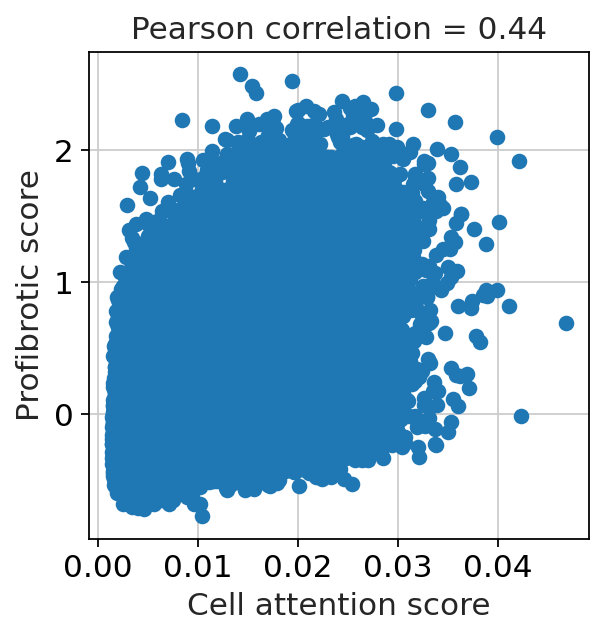

In [23]:
plt.scatter(macrophages.obs['cell_attn'], macrophages.obs['profibrotic_score'])
plt.xlabel('Cell attention score')
plt.ylabel('Profibrotic score')
plt.title(f'Pearson correlation = {pearson_corr[0, 1]:.2f}')

ipf macrophages

In [24]:
ipf_macrophages = macrophages[macrophages.obs['lung_condition_coarse'] == 'IPF'].copy()
ipf_macrophages

AnnData object with n_obs × n_vars = 104045 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [25]:
pearson_corr = np.corrcoef(ipf_macrophages.obs['cell_attn'].values, ipf_macrophages.obs['profibrotic_score'].values)
pearson_corr[0, 1]

0.4726270857090874

Text(0.5, 1.0, 'Pearson correlation = 0.47')

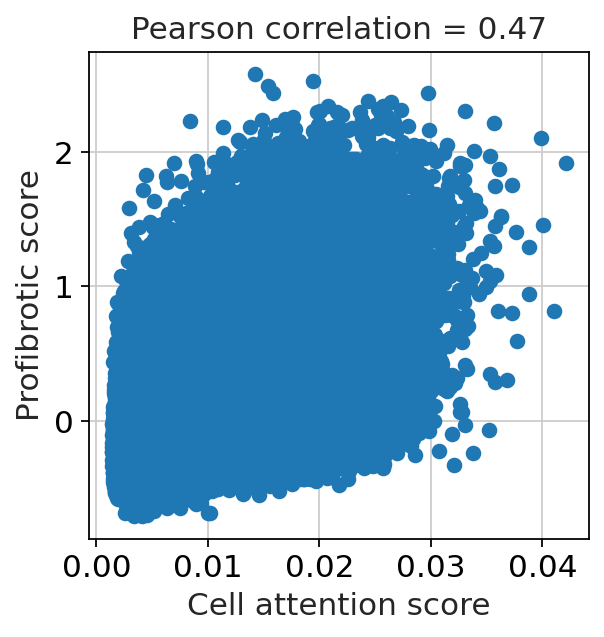

In [26]:
plt.scatter(ipf_macrophages.obs['cell_attn'], ipf_macrophages.obs['profibrotic_score'])
plt.xlabel('Cell attention score')
plt.ylabel('Profibrotic score')
plt.title(f'Pearson correlation = {pearson_corr[0, 1]:.2f}')

In [27]:
threshold_idx = int(len(ipf_macrophages) * 0.9)
threshold_value = sorted(ipf_macrophages.obs['cell_attn'])[threshold_idx]
threshold_value

0.01770123466849327

In [28]:
ipf_macrophages_top = ipf_macrophages[ipf_macrophages.obs['cell_attn'] >= threshold_value]
ipf_macrophages_top

View of AnnData object with n_obs × n_vars = 10405 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf

In [29]:
df1 = ipf_macrophages_top.obs[['profibrotic_score']]
df1.loc[:, 'group'] = 'top 10% cells'
df2 = ipf_macrophages.obs[['profibrotic_score']]
df2.loc[:, 'group'] = 'all cells'
df = pd.concat([df1, df2])
df

/tmp/ipykernel_1587302/2470000384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'group'] = 'top 10% cells'
/tmp/ipykernel_1587302/2470000384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'group'] = 'all cells'


,profibrotic_score,group
210CO_TCGGGACGTTTAAGCC_adams,0.580261,top 10% cells
157I-b_TACTCGCAGTAGATGT_adams,0.718379,top 10% cells
135I-a_GACCTGGTCTTTAGTC_adams,0.405926,top 10% cells
177I_GGTATTGTCTATCCTA_adams,1.907073,top 10% cells
210CO_TCCCGATCAAGTAATG_adams,-0.024488,top 10% cells
...,...,...
ILD61-2_TAAGTGCAGGACATTA_haberman,1.209434,all cells
228I-b_CGGACACTCAGGCAAG_adams,-0.037109,all cells
135I-b_CTAACTTTCTCAACTT_adams,-0.027960,all cells
F00431_GTCACAACAGTCCTTC_haberman,-0.445304,all cells


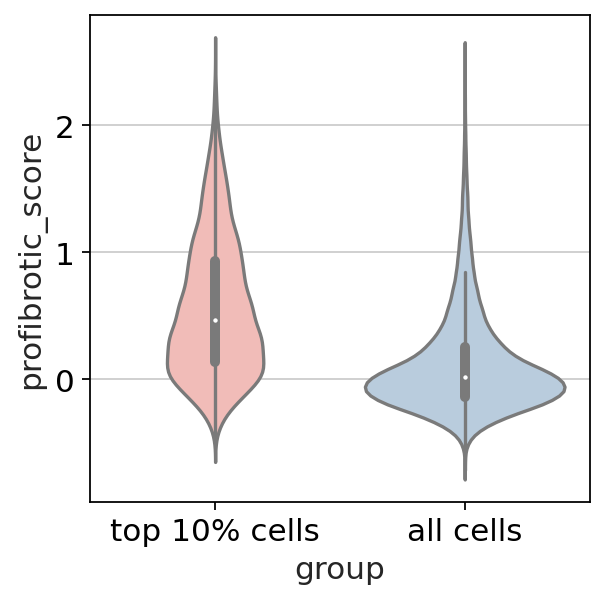

In [30]:
sns.violinplot(x="group", y="profibrotic_score", data=df, palette="Pastel1")
plt.savefig('figures/violin_profibrotic_score_top_vs_rest_ipf_macrophages.svg')

In [31]:
from scipy.stats import ttest_ind

In [32]:
ttestresult = ttest_ind(df1['profibrotic_score'], df2['profibrotic_score'])

In [33]:
ttestresult.pvalue

0.0

In [34]:
macrophages.obsm['genes'] = macrophages.X.copy()
macrophages

AnnData object with n_obs × n_vars = 158750 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [35]:
adata.write('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/adata_final.h5ad')